In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error

## The data

In [2]:
df = pd.read_csv("data/data_scaled.csv")
df.head()

,scaled_y,y,scaled_x1,scaled_x2,scaled_x3,scaled_x4,x_2_dumm,x_3_dumm,x_4_dumm,x1
0,-0.053227,139.0000,-0.143087,-0.087855,-0.096478,-0.089952,0,0,0,58.00
1,-0.034211,233.2596,-0.119559,-0.087855,-0.096478,-0.089952,0,0,0,79.34
2,-0.052016,145.0000,-0.105601,-0.087855,-0.096478,-0.089952,0,0,0,92.00
3,-0.057463,118.0000,-0.134267,-0.087855,-0.096478,-0.089952,0,0,0,66.00
4,-0.056051,125.0000,-0.128754,-0.087855,-0.096478,-0.089952,0,0,0,71.00


### Data Spliting

In [3]:
y = df['scaled_y']
X = df.drop(columns=['y', 'x_2_dumm', 'x_3_dumm', 'x_4_dumm', 'x1', 'scaled_y'])

In [4]:
X_train, X_test_cross, y_train, y_test_cross = train_test_split(X, y, test_size=0.4, random_state=101)

In [5]:
X_test, X_cross, y_test, y_cross = train_test_split(X_test_cross, y_test_cross, test_size=0.5,random_state=100)

In [6]:
print('y train vector size',  y_train.shape)
print('X train matrix size', X_train.shape)
print('- - * --'*3)
print('y test vector size',  y_test.shape)
print('X test matrix size', X_test.shape)
print('- - * --'*3)
print('y cross vector size',  y_cross.shape)
print('X cross matrix size', X_cross.shape)

y train vector size (5646,)
X train matrix size (5646, 4)
- - * --- - * --- - * --
y test vector size (1882,)
X test matrix size (1882, 4)
- - * --- - * --- - * --
y cross vector size (1882,)
X cross matrix size (1882, 4)


## Training

In [7]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [8]:
# Train the model on training data
rf.fit(X_train, y_train);

## Testing

In [9]:
yhat = rf.predict(X_test)

In [10]:
mse = mean_squared_error(y_test, yhat)

In [11]:
mse

0.0013583096829836393

#### Variable Importance

In [12]:
feature_list = list(X_train.columns)

In [13]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# # List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# # Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# # Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: scaled_x1            Importance: 0.91
Variable: scaled_x3            Importance: 0.04
Variable: scaled_x4            Importance: 0.04
Variable: scaled_x2            Importance: 0.02


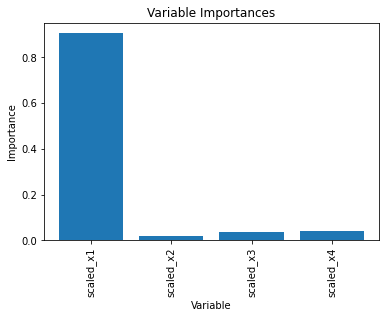

In [14]:
# Set the style
# plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

________
## Hyperparameter Tunning

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

https://www.kaggle.com/code/jnikhilsai/cross-validation-with-linear-regression

In [23]:
# # Import tools needed for visualization
# from sklearn.tree import export_graphviz
# import pydot
# # Pull out one tree from the forest
# tree = rf.estimators_[5]
# # Import tools needed for visualization
# from sklearn.tree import export_graphviz
# import pydot
# # Pull out one tree from the forest
# tree = rf.estimators_[5]
# # Export the image to a dot file
# export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# # Use dot file to create a graph
# (graph, ) = pydot.graph_from_dot_file('tree.dot')
# # Write graph to a png file
# graph.write_png('tree.png')

In [24]:
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


### Random Hyperparameter Grid

In [39]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 60, stop = 120, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [60, 66, 73, 80, 86, 93, 100, 106, 113, 120]}


### Random Search Training

In [41]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [60, 66, 73, 80, 86, 93,
                                                         100, 106, 113, 120]},
                   random_state=42, verbose=2)

In [42]:
rf_random.best_params_

{'n_estimators': 120,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [47]:
def evaluate(base_model, X_test, y_test):
    yhat = base_model.predict(X_test)
    mse = mean_squared_error(y_test, yhat)
    accuracy = 100 - mse
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(mse)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.0014 degrees.
Accuracy = 100.00%.


In [48]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.0012 degrees.
Accuracy = 100.00%.


In [49]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.00%.


### Grid Search with CV

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [15, 20, 30],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 120, 150]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [53]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 162 candidates, totalling 486 fits


{'bootstrap': False,
 'max_depth': 15,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [54]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 0.0012 degrees.
Accuracy = 100.00%.


In [55]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.00%.


## Tunned Model

In [56]:
rf_final = RandomForestRegressor(n_estimators=100, random_state=42,
                                 max_depth=15,
                                 bootstrap=False,
                                 max_features=2,
                                 min_samples_split=10,
                                 min_samples_leaf=3,)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [84]:
print('y train vector size',  y_train.shape)
print('X train matrix size', X_train.shape)
print('- - * --'*3)
print('y test vector size',  y_test.shape)
print('X test matrix size', X_test.shape)

y train vector size (6587,)
X train matrix size (6587, 4)
- - * --- - * --- - * --
y test vector size (2823,)
X test matrix size (2823, 4)


In [88]:
# Train the model on training data
rf_final.fit(X_train, y_train);

In [78]:
yhat_final = rf_final.predict(X_test)

In [79]:
mse_final = mean_squared_error(y_test, yhat_final)

In [80]:
mse_final

0.0013573956591243048

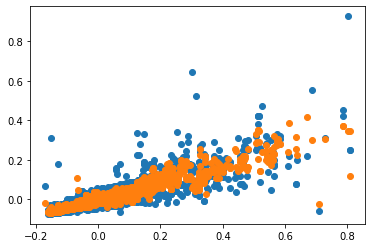

In [86]:
plt.scatter(X_test['scaled_x1'], y_test, label='test data')
plt.scatter(X_test['scaled_x1'], yhat_final, label = 'yhat')
# plt.scatter(X_cross['scaled_x1'], y_cross, label = 'cv')

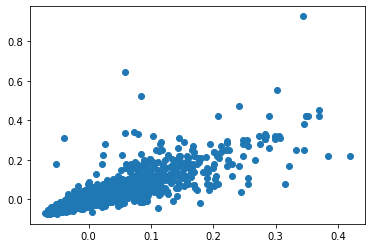

In [89]:
plt.scatter(yhat_final, y_test, label='test data')

In [94]:
y_test.count

<bound method Series.count of 2360   -0.027808
2993    0.225727
6076   -0.002793
7716    0.019599
1139    0.307389
          ...   
3007   -0.023774
1443    0.045129
5773   -0.062103
5670   -0.015704
8809   -0.001986
Name: scaled_y, Length: 2823, dtype: float64>